In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
data = pd.read_excel('../data/Marketing_Campaign_Dataset_1_TRAIN.xlsx')

In [3]:
data

,Loyalty_Card_ID,Loyalty_Date,Loyalty_Year,Year_Birth,Education,Gender,Glasses,Marital_Status,Right_Handed,Income,...,Store_Count_Item,Total_Amt_Item,Total_Count_Item,Discount_Purchase,Online_Visits_Month,Email_Opened,Email_Clicks,Facebook_Profile_ID,Insta_Profile_ID,Score
0,1061567,2022-05-02,2,2003,Less than High School,Other,0,Married,1,44291,...,493,6457,852,34,30,36,20,xGQqYVZo8y,1EeiJ1vJ7K,0
1,1071191,2023-07-10,3,1997,Bachelor Degree,Female,0,Single,0,97248,...,152,3545,579,32,44,0,0,hEv1taoRlB,hiQkj5Eipv,1
2,1009191,2023-06-19,3,1978,High School Diploma,Female,1,Widow,0,39209,...,102,4486,329,21,32,13,21,LvOqV1rP5M,SPA7MEwOtj,1
3,1077133,2023-10-31,3,1954,Bachelor Degree,Female,1,Married,0,92976,...,54,6596,515,51,32,44,18,X8UfvFc39w,GQ3QxjNKDj,2
4,1060798,2021-08-06,1,1948,High School Diploma,Male,1,Married,1,42921,...,463,6632,691,34,2,24,9,EkEbeWaIZS,zjAPYc6cq3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1097456,2023-12-21,3,1969,Bachelor Degree,Female,1,Married,1,214584,...,156,2844,578,25,12,8,24,jhNpflPyJ7,siyO2mdR1a,0
89996,1023240,2022-10-03,2,1948,Advanced Degree,Female,0,Single,1,133069,...,278,6294,519,17,31,15,17,AydbCyejue,CsoSFmKe7g,1
89997,1010755,2021-09-03,1,1961,Less than High School,Female,0,Married,1,7541,...,331,3366,437,29,44,22,12,Oo5vfTQCCi,6XnGq2DAL0,4
89998,1065748,2023-12-05,3,1986,High School Diploma,Female,1,Divorced,0,43474,...,346,2944,623,47,1,25,11,dtl5n7wM4Z,FfiIezq3lW,3


In [10]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Loyalty_Card_ID      90000 non-null  int64         
 1   Loyalty_Date         90000 non-null  datetime64[us]
 2   Loyalty_Year         90000 non-null  int64         
 3   Year_Birth           90000 non-null  int64         
 4   Education            90000 non-null  str           
 5   Gender               90000 non-null  str           
 6   Glasses              90000 non-null  int64         
 7   Marital_Status       90000 non-null  str           
 8   Right_Handed         90000 non-null  int64         
 9   Income               90000 non-null  int64         
 10  Household_ID         90000 non-null  int64         
 11  Kid_Home             89992 non-null  float64       
 12  Teen_Home            89996 non-null  float64       
 13  Home_Address         90000 non-null  str  

### My Variables:

| Variable           | Data Type |
|-------------------|-----------|
| Loyalty_Card_ID   | Nominal   |
| Loyalty_Date      | Interval  |
| Loyalty_Year      | Ordinal   |
| Year_Birth        | Interval  |
| Education         | Ordinal   |
| Gender            | Nominal   |
| Glasses           | Nominal   |
| Marital_Status    | Nominal   |
| Right_Handed      | Nominal   |
| Income            | Interval  |

### Loyalty_Card_ID

In [11]:
print(data['Loyalty_Card_ID'].nunique())

89998


In [12]:
repeating_values = [
    value
    for value, count in data['Loyalty_Card_ID'].value_counts().items()
    if count > 1
]

In [13]:
print(repeating_values)

[1011608, 1083977]


In [14]:
rows = data[data['Loyalty_Card_ID'].isin([1011608, 1083977])]

print(rows)

       Loyalty_Card_ID Loyalty_Date  Loyalty_Year  Year_Birth  \
50087          1011608   2022-09-17             2        1995   
64940          1083977   2021-06-20             1        1926   
67015          1011608   2022-09-17             2        1995   
89110          1083977   2021-06-20             1        1926   

             Education  Gender  Glasses Marital_Status  Right_Handed  Income  \
50087  Bachelor Degree  Female        0       Divorced             1   79567   
64940  Advanced Degree   Other        0        Married             0  156388   
67015  Bachelor Degree  Female        0       Divorced             1   79567   
89110  Advanced Degree   Other        0        Married             0  156388   

       ...  Store_Count_Item  Total_Amt_Item  Total_Count_Item  \
50087  ...               249            5322               387   
64940  ...               232            5939               533   
67015  ...               249            5322               387   
89110  ..

In [15]:
print(len(data))
data = data.drop_duplicates()

print(len(data))

90000
89998


### Loyalty_Date

In [21]:
print([value for value in data['Loyalty_Date'].isna() if value == 'True'])

[]


In [16]:
loyalty_dates = pd.to_datetime(data['Loyalty_Date'], errors='coerce')
print('Minimum Loyalty_Date:', loyalty_dates.min())
print('Maximum Loyalty_Date:', loyalty_dates.max())

Minimum Loyalty_Date: 2021-01-01 00:00:00
Maximum Loyalty_Date: 2023-12-31 00:00:00


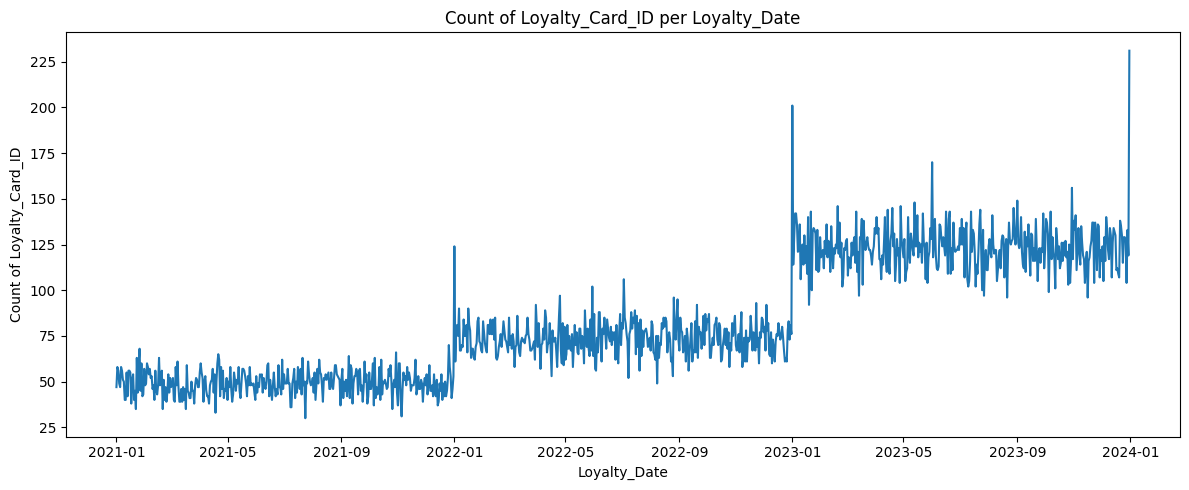

In [17]:
ts_counts = (
    data.assign(Loyalty_Date=loyalty_dates)
        .dropna(subset=['Loyalty_Date'])
        .groupby('Loyalty_Date')['Loyalty_Card_ID']
        .count()
        .sort_index()
)
plt.figure(figsize=(12, 5))
plt.plot(ts_counts.index, ts_counts.values)
plt.title('Count of Loyalty_Card_ID per Loyalty_Date')
plt.xlabel('Loyalty_Date')
plt.ylabel('Count of Loyalty_Card_ID')
plt.tight_layout()
plt.show()

### Loyalty_Year

In [22]:
print([value for value in data['Loyalty_Year'].isna() if value == 'True'])

[]


In [25]:
counts = data['Loyalty_Year'].value_counts()
percs = data['Loyalty_Year'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Loyalty_Year,,
3,45100,0.501122
2,26947,0.299418
1,17951,0.199460


### Year_Birth

In [26]:
print([value for value in data['Year_Birth'] if value == 'True'])

[]


In [27]:
print(data['Year_Birth'].describe())

count    89998.000000
mean      1964.027767
std         24.207009
min       1923.000000
25%       1943.000000
50%       1964.000000
75%       1985.000000
max       3000.000000
Name: Year_Birth, dtype: float64


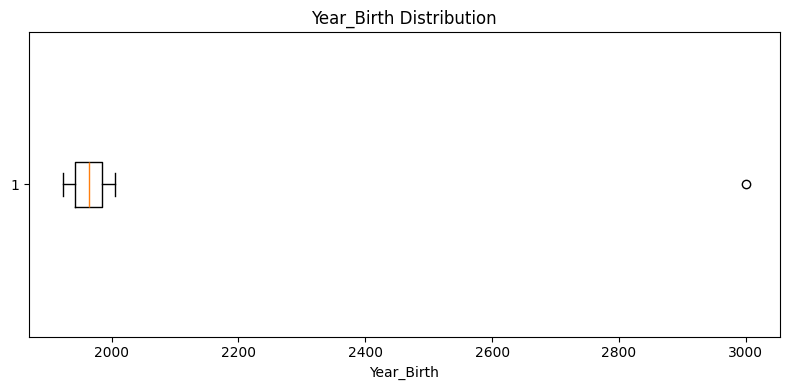

In [29]:
plt.figure(figsize=(8, 4))
plt.boxplot(data['Year_Birth'].dropna(), vert=False)
plt.title('Year_Birth Distribution')
plt.xlabel('Year_Birth')
plt.tight_layout()
plt.show()


In [30]:
data = data[data['Year_Birth'] != 3000]
print('Rows after dropping Year_Birth == 3000:', len(data))

Rows after dropping Year_Birth == 3000: 89997


In [33]:
print(data['Year_Birth'].describe())

count    89997.000000
mean      1964.016256
std         23.959554
min       1923.000000
25%       1943.000000
50%       1964.000000
75%       1985.000000
max       2005.000000
Name: Year_Birth, dtype: float64


In [36]:
print(data['Year_Birth'].median())
print(data['Year_Birth'].skew())
print(data['Year_Birth'].kurtosis())

1964.0
-0.0027310449171875986
-1.202022990182026


### Education

In [31]:
print([value for value in data['Education'].isna() if value == 'True'])

[]


In [32]:
counts = data['Education'].value_counts()
percs = data['Education'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Education,,
Bachelor Degree,28546,0.317188
Advanced Degree,23568,0.261875
High School Diploma,22614,0.251275
Less than High School,15269,0.169661


### Gender

In [37]:
print([value for value in data['Gender'].isna() if value == 'True'])

[]


In [38]:
counts = data['Gender'].value_counts()
percs = data['Gender'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Gender,,
Female,39396,0.437748
Male,31017,0.344645
Other,19579,0.217552
Woman,5,0.000056


In [40]:
data['Gender'] = data['Gender'].replace('Woman', 'Female')

In [41]:
counts = data['Gender'].value_counts()
percs = data['Gender'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Gender,,
Female,39401,0.437803
Male,31017,0.344645
Other,19579,0.217552


### Glasses

In [42]:
print([value for value in data['Glasses'].isna() if value == 'True'])

[]


In [43]:
counts = data['Glasses'].value_counts()
percs = data['Glasses'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Glasses,,
1,45258,0.502883
0,44739,0.497117


### Marital_Status

In [44]:
print([value for value in data['Marital_Status'].isna() if value == 'True'])

[]


In [45]:
counts = data['Marital_Status'].value_counts()
percs = data['Marital_Status'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Marital_Status,,
Single,25575,0.284176
Married,21060,0.234008
Divorced,18088,0.200984
Widow,14883,0.165372
Other,10390,0.115448
Window,1,0.000011
